In [1]:
import pandas as pd
import networkx as nx
import numpy as np
import pickle

In [2]:
file_path = '519_anon_fall2023.csv'
df = pd.read_csv(file_path)
cols = len(df.columns)
print(df.columns)

Index(['34166d55bf8b4df36376c6ed4126b276', 'f3ba5b908d3366d3d76e47f4b69fdb08',
       '83bbde49408856b53ef1f123bd4b489b', '010e5ac203a6b7be05224d3aeb708d43',
       '4fd267f116ac20e3020b1bd9001e2c8d', 'f6995000c0178087cbc01ba94d9fd13b',
       '7fbf9d6e12aef47dd882527130e7b853', '7c4039fec3ea99d50511d13767364531',
       'Mondays', 'Tuesdays', 'Wednesdays', 'Thursdays', 'Fridays', 'id name',
       'email anonymized', 'anonymized group preference'],
      dtype='object')


In [3]:
numOfProjects = 8
columns_to_drop = ['id name', 'Mondays', 'Tuesdays', 'Wednesdays', 'Thursdays', 'Fridays']
df_dropped_multiple = df.drop(columns=columns_to_drop)

# If you want to modify the DataFrame in place, use inplace=True
df.drop(columns=columns_to_drop, inplace=True)

column_name_mapping = {
    df.columns[-2]: 'id',
    df.columns[-1]: 'friends',
}

for i in range(0, numOfProjects):
    column_name_mapping[df.columns[i]] = df.columns[i][-5:]
    
df.rename(columns=column_name_mapping, inplace=True)

In [4]:
projects = [p for p in list(df.columns[0:numOfProjects])]
numOfProjects = len(projects)

In [5]:
c = dict()
G = nx.Graph()
nodes = []
for index, row in df.iterrows():
    id = row['id'][-5:]
    nodes.append(id)
    preferences = [int(row[p][:-2]) for p in projects]
    for p, pref in zip(projects, preferences):
        c[(id, p)] = (numOfProjects - pref + 1) / numOfProjects
    
    # friends
    friends = row['friends'].strip("[]").replace("'", "").split(",")
    for f in friends:
        if f:
            G.add_edge(id, f[-5:])
            
G.add_nodes_from(nodes)
G_c = nx.complement(G)
w = dict()
for e in G_c.edges:
    w[e] = 1
edges = list(G_c.edges)

Num of students = 26
Num of (friend) edges = 7


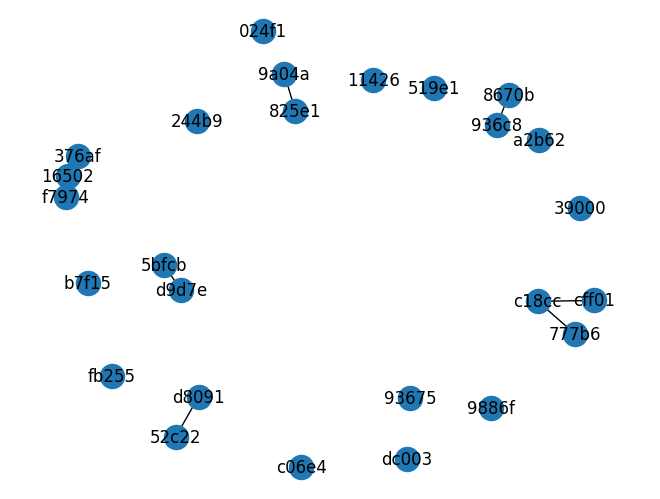

In [6]:
print(f'Num of students = {len(nodes)}')
print(f'Num of (friend) edges = {len(G.edges)}')

nx.draw(G, pos=nx.spring_layout(G, k=0.2, iterations=20), with_labels=True)

In [7]:
max_capacities = dict()
for p in projects:
    max_capacities[p] = 4

In [8]:
with open(f'./cs519.pickle', 'wb') as file:
    pickle.dump(projects, file) # project names
    pickle.dump(max_capacities, file) # max capacity for each project
    pickle.dump(c, file) # project preferences
    pickle.dump(w, file) # weights of conflict edges
    pickle.dump(edges, file) # conflict edges
    file.close()